In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Final_Supply_Chain.csv')

In [16]:
features=df[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Product Status', 'Shipping Mode']]
#features = features.drop(columns = ['Late_delivery_risk','Type'])


In [17]:
features['shipping date (DateOrder)'] = pd.to_datetime(df['shipping date (DateOrders)'])
features['shipping_day_of_week'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.dayofweek
features['shipping_date'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.day
features['shipping_month'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.month

C:\Users\stern\AppData\Local\Temp\ipykernel_19884\3443434395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['shipping date (DateOrder)'] = pd.to_datetime(df['shipping date (DateOrders)'])
C:\Users\stern\AppData\Local\Temp\ipykernel_19884\3443434395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['shipping_day_of_week'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.dayofweek
C:\Users\stern\AppData\Local\Temp\ipykernel_19884\3443434395.py:3: SettingWithCopyWarning: 
A value 

In [18]:
#features.isnull().sum()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [21]:
target = df['Late_delivery_risk']
features=features.apply(Labelencoder_feature)
features.head()

final_features=features[['Order Region', 'Delivery Status', 
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Shipping Mode','shipping_day_of_week','shipping_date','shipping_month','Late_delivery_risk']]

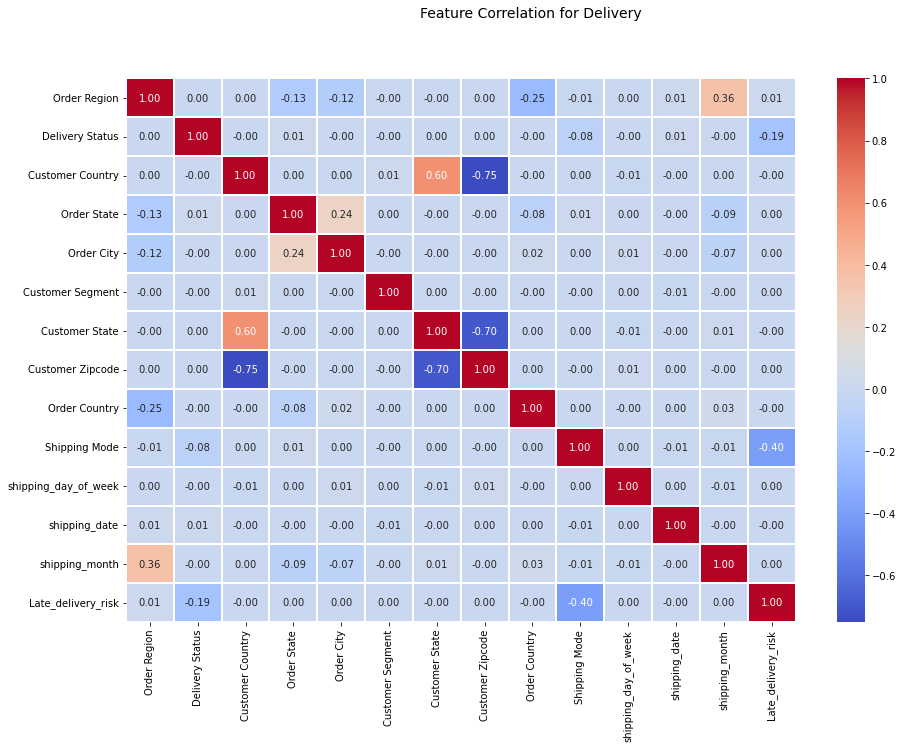

In [22]:
corr = final_features.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
#f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation for Delivery', fontsize=14)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_features)
scaled_df = pd.DataFrame(scaled_df) 



In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size = 0.2, random_state = 42)